In [1]:
# I am just ignoring warnings becuase seaborn hasn't been updated in a while
# Never do this unless you know what warnings you are ignoring
import warnings
warnings.filterwarnings('ignore') 

# A few EDA pointers

Some pointers on useful pandas and seaborn functions to conduct EDA on a new dataset. This is of course not the only way of doing EDA, so help yourself to what you find useful and leave the rest.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Personal preference, this is about the maximum amount of customization I think is needed for EDA
sns.set(context='notebook', style='ticks', font_scale=1.2, rc={'axes.spines.right':False, 'axes.spines.top':False})

titanic = pd.read_csv('train.csv', )
titanic.columns = titanic.columns.str.lower() # less shift clicking

`head()` is the most useful place to start to get a feel of what the data looks like.

In [3]:
titanic.head()

passengerid  survived  pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                name     sex   age  sibsp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   parch            ticket     fare cabin embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

`info()` is good for viewing data shape, missing values, and column data types.

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
passengerid    891 non-null int64
survived       891 non-null int64
pclass         891 non-null int64
name           891 non-null object
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
ticket         891 non-null object
fare           891 non-null float64
cabin          204 non-null object
embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


`nunique()` displays the number of unique values for each column, which is useful to understand the structure of the data and for faceting and hueing later on.

In [5]:
titanic.nunique()

passengerid    891
survived         2
pclass           3
name           891
sex              2
age             88
sibsp            7
parch            7
ticket         681
fare           248
cabin          147
embarked         3
dtype: int64

`describe()` gives and idea of distribution shapes (although I usually think it's easier to see this in plots, but a quick peak can't hurt).

In [6]:
titanic.describe()

passengerid    survived      pclass         age       sibsp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            parch        fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

The fastest way to view all univariate distributions is via the `hist()` method of pandas data frames.

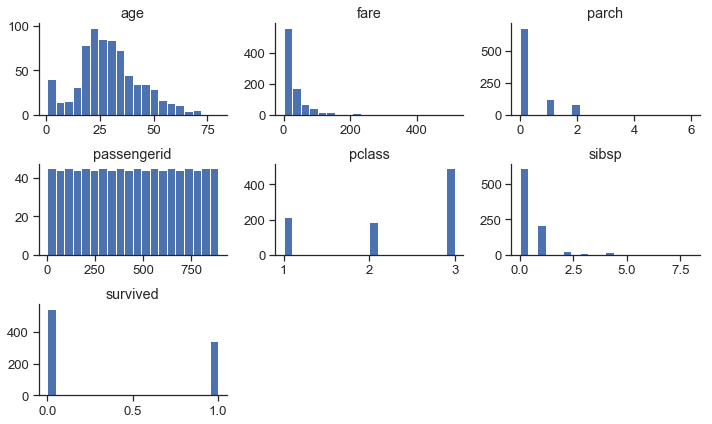

In [7]:
titanic.hist(figsize=(10,6), grid=False, bins=20)
plt.tight_layout()

Although some of these numerical variables are actually categorical, I would leave them in as numbers initially, just to eyeball if there are any obvious relationships to follow up on later.

`sns.pairplot()` shows the pair-wise variable relationships in addition to the single variable distributions. I tend to favor doing this directly instead of `hist()`, but both have their use cases. The pairplot grid can take quite some time to create for big data sets, so it can be a good idea to use `sample()` to only plot a subset of the data (but be sure to run it a few times to sample different subsets).

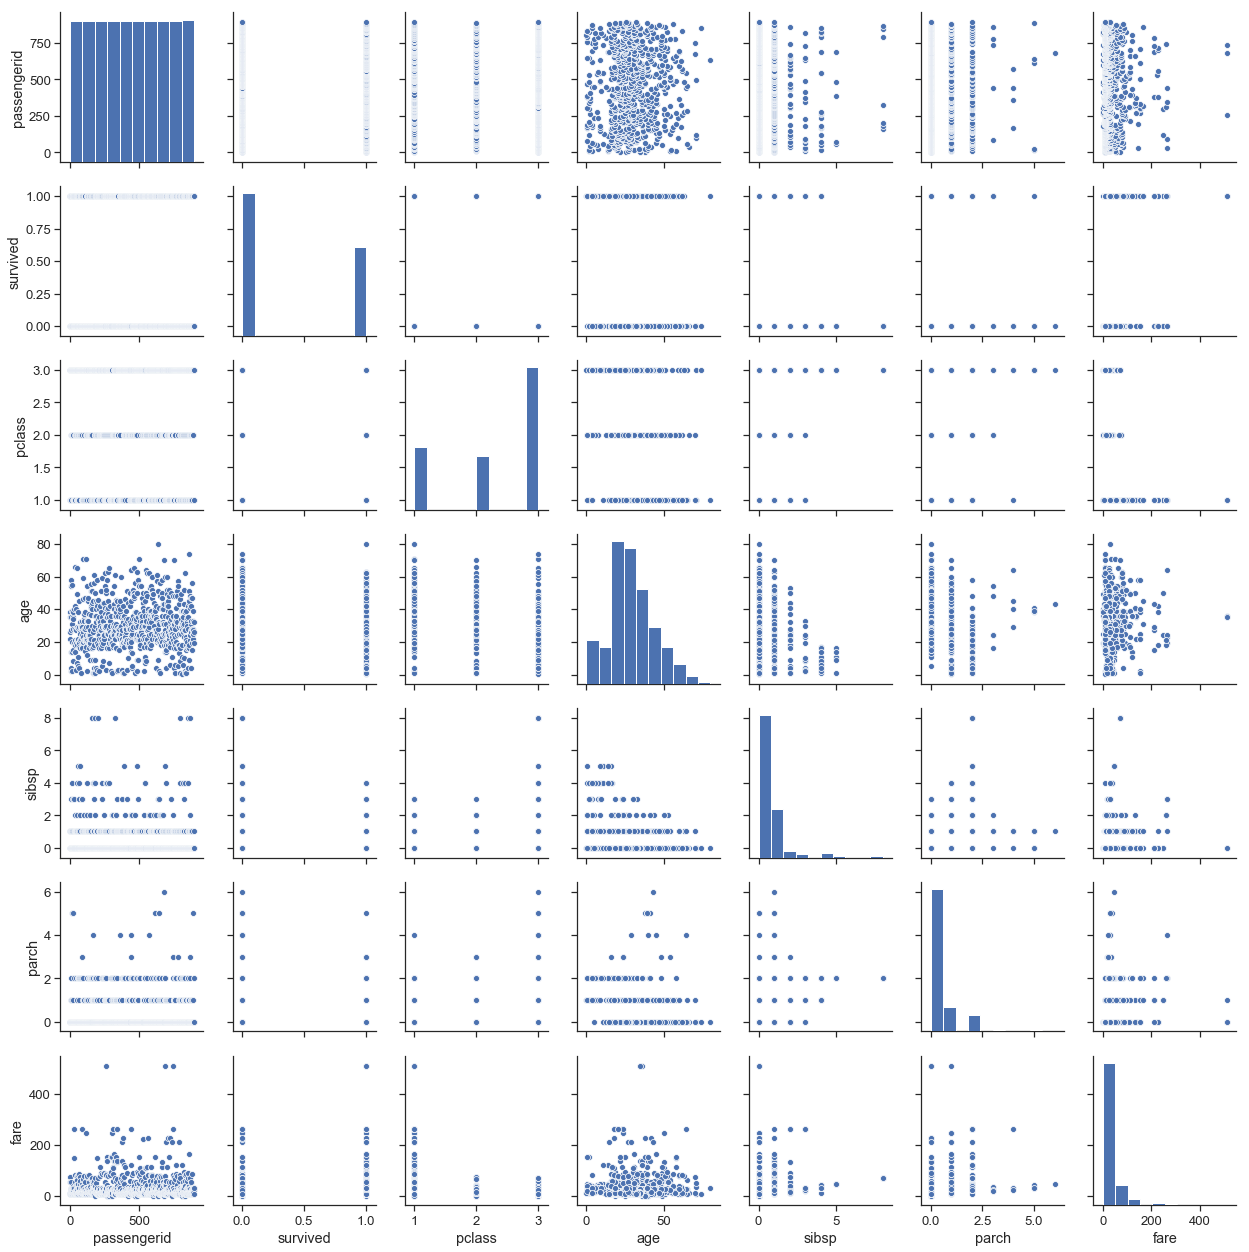

In [8]:
sns.pairplot(titanic)

The `hue` parameter makes it straightforward to split by variables (variable choice can be guided by `nunique()` and/or the plot above).

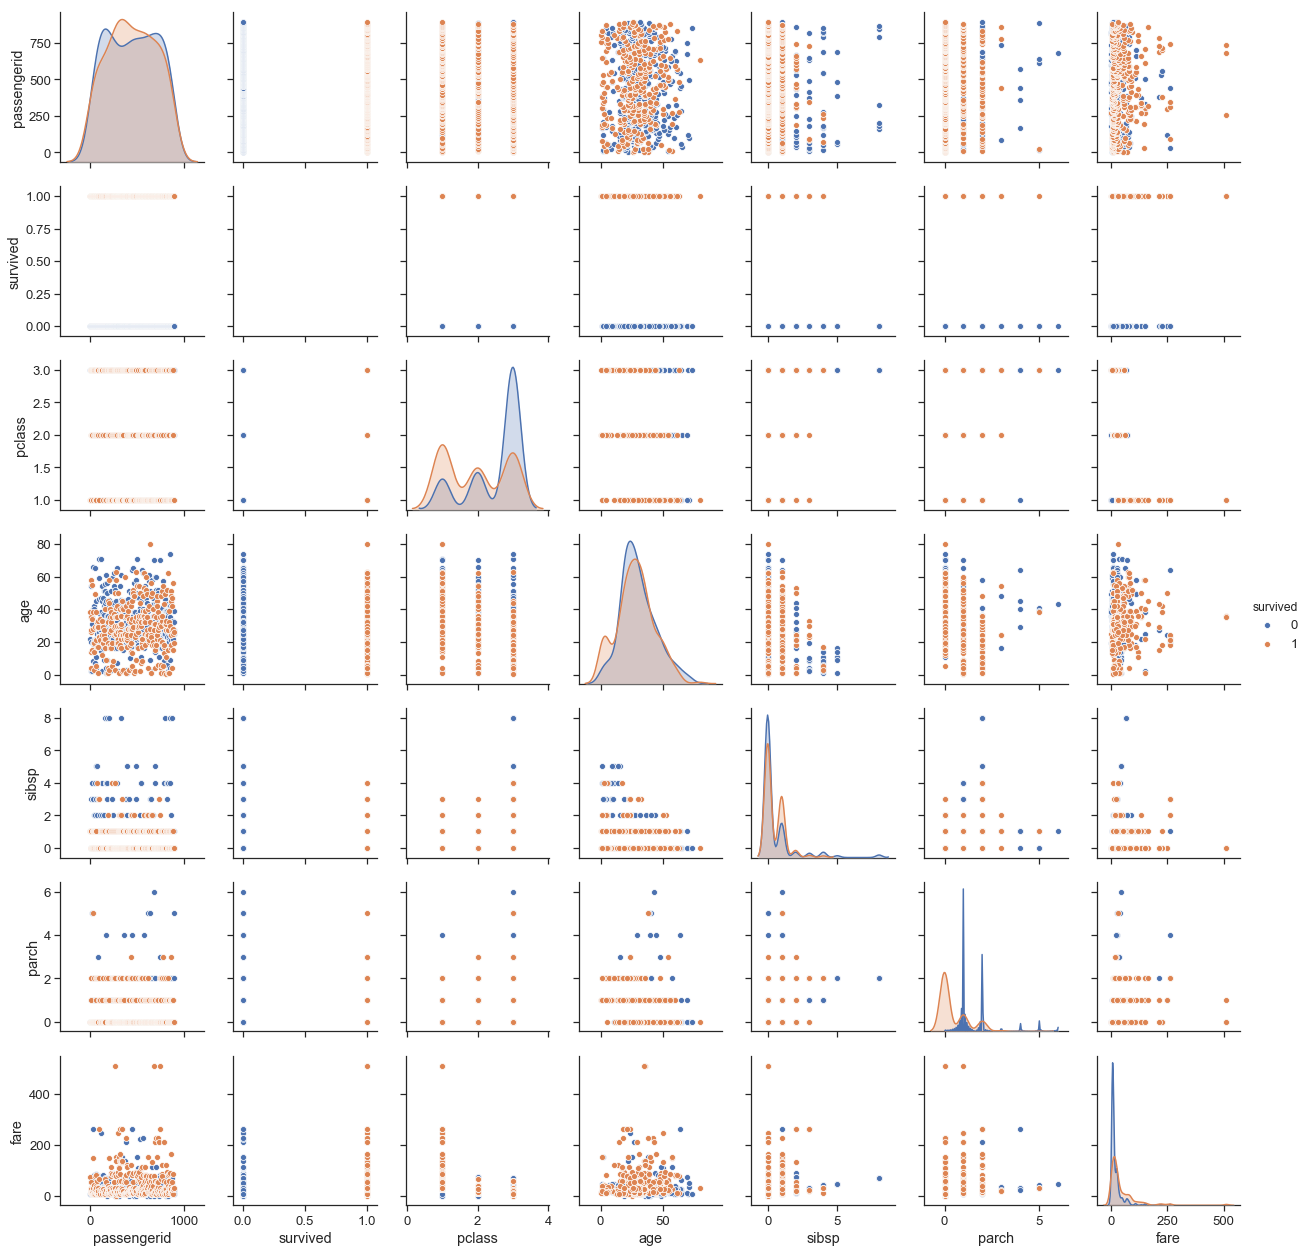

In [9]:
sns.pairplot(titanic, hue='survived')

It is good to keep in mind that the diagonal KDE-plots can be a bit misleading for discrete data (especially the categorical columns here). I might do a few more of these hue splits depending on how the data looks, potentially with fewer columns to create smaller plots.

Around this point I would encode the variables with what I believe is their correct data type to facilitate exploring them further.

In [10]:
cols_to_cat = ['survived', 'pclass', 'sibsp', 'parch', 'embarked', 'sex']
titanic[cols_to_cat] = titanic[cols_to_cat].astype('category')
titanic = titanic.set_index('passengerid') # or drop this column
# `pd.cut()` can be used to change a numeric dtype into categorical bins

Now the pairplot is focused on the relationship between continuous variables.

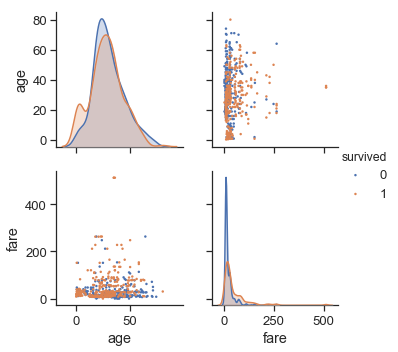

In [11]:
numeric_cols = titanic.select_dtypes('number').columns
sns.pairplot(titanic, hue='survived', vars=numeric_cols, plot_kws={'s':6, 'edgecolor':'none'})

Since the scatters are still saturated, I would probably want to investigate these two variables with separate 2D histograms or similar instead of different colors in the scatter plot.

*What I have done up until this point are what I tend to do most of the time. The below is more situational for me, so there might be better ways of going about it (such as rectangular area plots), but this approach is quick without any additional imports.*

To quickly gauge relationships between categorical and continuous variables, I would loop over the columns and subset the data. You could do some of this in a Facetgrid, but the melting steps are not easier than the loops in my opinion, and Facetgrids are really meant to display multiple subsets of the data by distributing variable values across columns and rows in the plot grid but keeping the x and y axes the same throughout. 

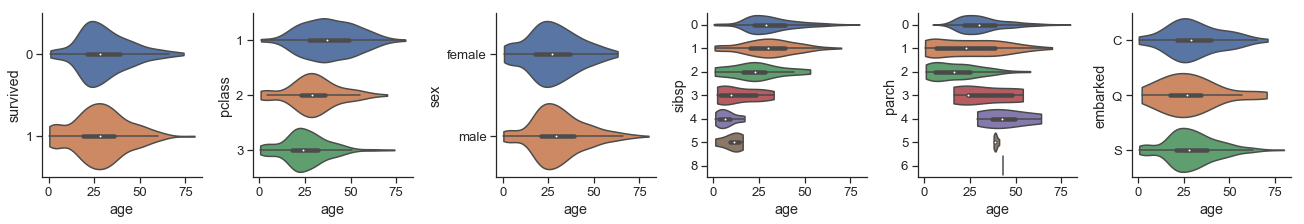

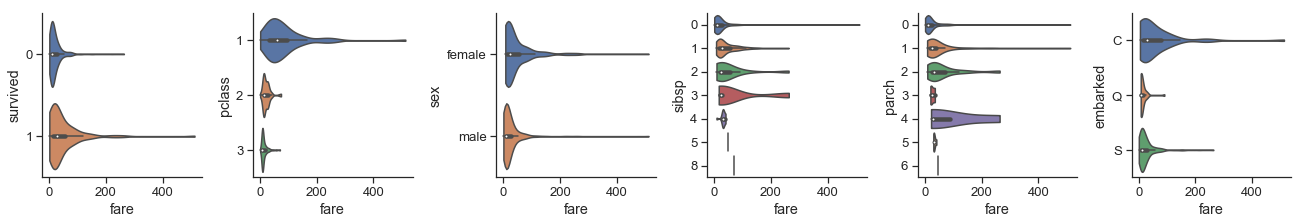

In [12]:
cat_cols = titanic.select_dtypes('category').columns.to_list()
num_cols = len(cat_cols)
for numeric_col in numeric_cols.to_list():
    fig, axes = plt.subplots(1, num_cols, figsize=(num_cols * 3, 3), constrained_layout=True)
    for col, ax in zip(cat_cols, axes.flatten()):
        # I would prefer a swarmplot if there were less data points
        sns.violinplot(x=numeric_col, y=col, data=titanic, ax=ax, cut=0, scale='width')
        # I might add some sort of dotplot here, e.g. sns.stripplot or the fliers only from a boxplot

`sns.countplot()` can be used to show counts of categorical variables as barplots without the need for manually plotting `value_counts()`.

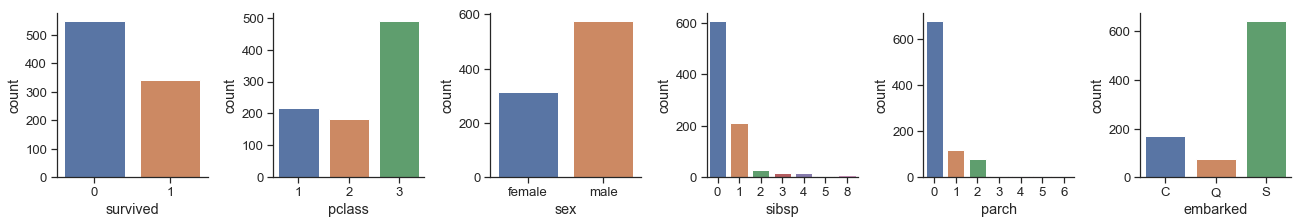

In [13]:
fig, axes = plt.subplots(1, num_cols, figsize=(num_cols * 3, 3), constrained_layout=True)
for col, ax in zip(cat_cols, axes.flatten()):
    sns.countplot(x=col, data=titanic, ax=ax)#color='steelblue')

To understand relationships between the categorical variables, I would loop over the categorical columns and subset the data to count occurrences in the subsets. Again, you could do some of this in a Facetgrid, but it is a bit buggy for categorical counting since it is not its intended function.

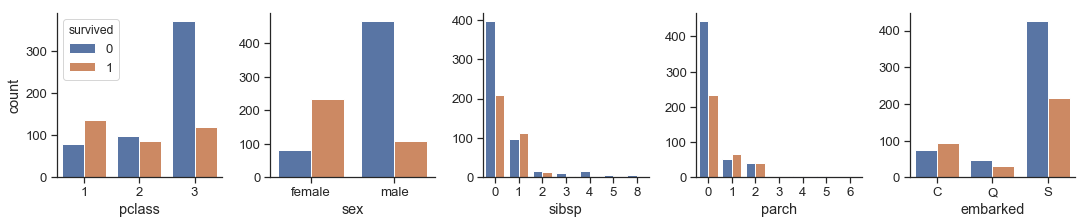

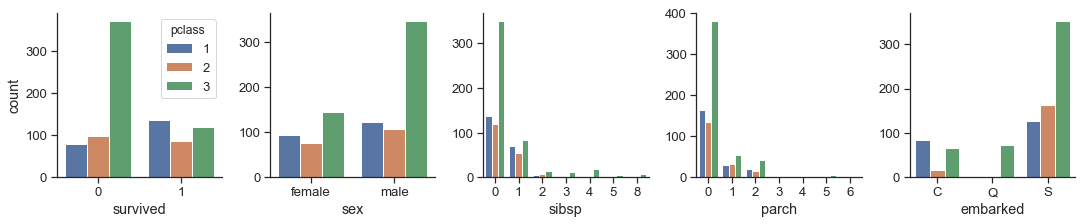

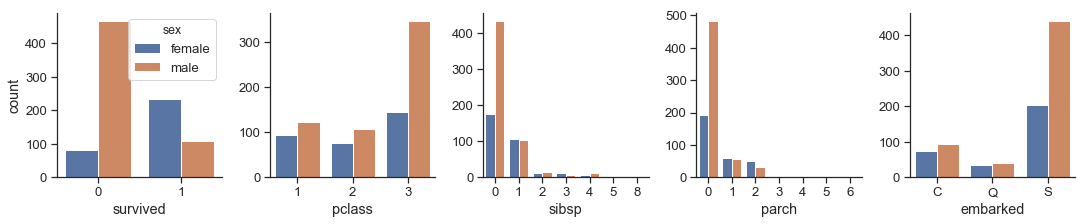

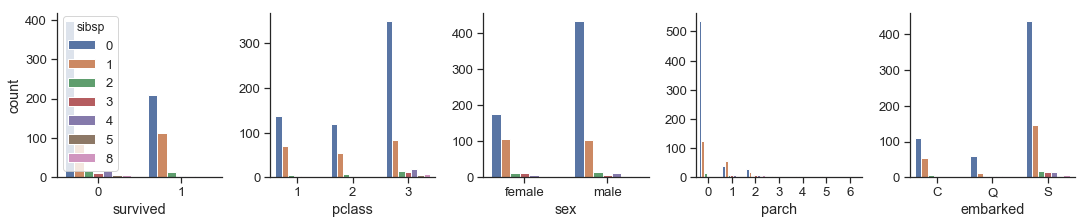

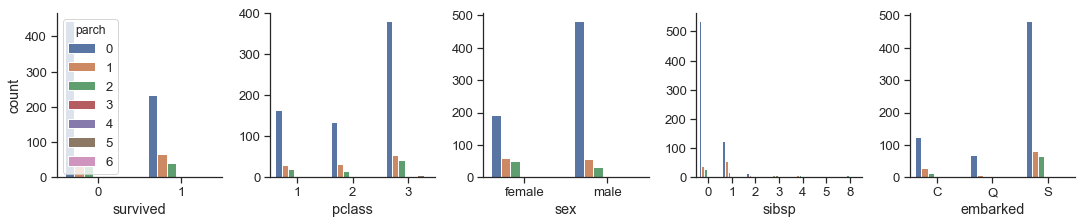

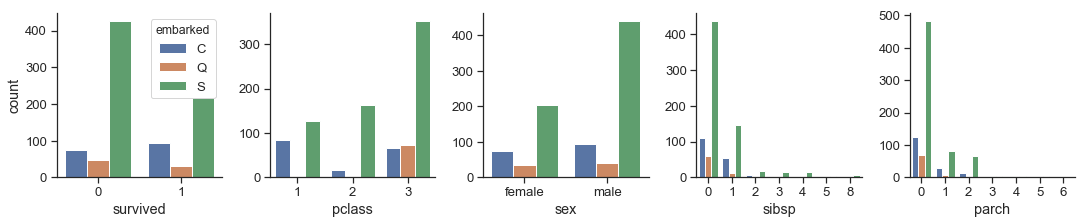

In [14]:
for hue_col in cat_cols:
    cat_cols_to_plot = [col for col in cat_cols if col != hue_col]
    num_cols = len(cat_cols_to_plot)
    fig, axes = plt.subplots(1, num_cols, figsize=(num_cols * 3, 3), constrained_layout=True)
    for col, ax in zip(cat_cols_to_plot, axes.flatten()):
        sns.countplot(x=col, data=titanic, ax=ax, hue=hue_col)
        # The below is optional
        if not ax == axes.flatten()[0]:
            ax.legend_.remove()
            ax.set_ylabel('')

The above could be made into one big subplot grid also, but it would involve a bit more verbose and EDA is ideally done without too much thinking about graphics layouts.

After this initial broad EDA, I would start more targeted EDA by using `sns.relplot` to explore relationships between two continuous variables and `sns.catplot` to explore relationships between a continuous and a categorical variable. Both of these plotting functions allow the use of small multiples (facets) to break the data into categorical subsets. The [seaborn tutorials](https://seaborn.pydata.org/tutorial.html) is a good place to learn more about this 
 I also created [this tutorial](https://nbviewer.jupyter.org/github/UofTCoders/2018-09-10-utoronto/blob/gh-pages/code/3-data-wrangling-and-viz.ipynb#Exploring-relationships-between-two-quantitative-variables) as part of UofTCoders.